In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

df_goalkeeper = pd.read_csv("ucl_2122_datasets/goalkeeping.csv")
df_disciplin = pd.read_csv("ucl_2122_datasets/disciplinary.csv")
df_distributon = pd.read_csv("ucl_2122_datasets/distributon.csv")
df_keystats = pd.read_csv("ucl_2122_datasets/key_stats.csv") 
df_attacking = pd.read_csv("ucl_2122_datasets/attacking.csv")

In [7]:
df_goalkeeper.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches_made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [50]:
df_goalkeeper["saved_per_match"] = round(df_goalkeeper.saved / df_goalkeeper.match_played, 2)
saved_per_match = df_goalkeeper.loc[:,["player_name","saved","match_played", "saved_per_match"]]

filtered_df_saved = saved_per_match[saved_per_match["match_played"] > 5]
sorted_filtered_df_saved = filtered_df_saved.sort_values(by='saved_per_match', ascending=False)
sorted_filtered_df_saved

#"The ranking of goalkeepers' saves per match who have played more than 5 matches"

,player_name,saved,match_played,saved_per_match
0,Courtois,61,13,4.69
4,Mignolet,28,6,4.67
2,Vlachodimos,38,10,3.80
6,Musso,21,6,3.50
1,Rulli,41,12,3.42
10,Diogo Costa,18,6,3.00
8,De Gea,19,7,2.71
16,Ter Stegen,16,6,2.67
5,Oblak,26,10,2.60
14,Adán,17,7,2.43


In [83]:
df_goalkeeper["conceded_per_match"] = round(df_goalkeeper.conceded / df_goalkeeper.match_played,2)
conceded_per_match = df_goalkeeper.loc[:,["player_name","conceded","match_played", "conceded_per_match"]]

filtered_df_conceded = conceded_per_match[conceded_per_match["match_played"] > 5]
sorted_filtered_df_conceded = filtered_df_conceded.sort_values(by='conceded_per_match', ascending=False)
sorted_filtered_df_conceded

#"The ranking of goalkeepers' conceded per match who have played more than 5 matches"

,player_name,conceded,match_played,conceded_per_match
4,Mignolet,20,6,3.33
6,Musso,13,6,2.17
14,Adán,13,7,1.86
10,Diogo Costa,11,6,1.83
19,Kobel,11,6,1.83
15,Köhn,14,8,1.75
2,Vlachodimos,17,10,1.70
16,Ter Stegen,9,6,1.50
20,Szczęsny,10,7,1.43
1,Rulli,16,12,1.33


In [85]:
df_goalkeeper["punches_save_ratio(%)"] = round(df_goalkeeper.punches_made/ df_goalkeeper.saved * 100,2)
punch_ratio = df_goalkeeper.loc[:,["player_name","match_played","saved","punches_made", "punches_save_ratio(%)"]]

filtered_df_punchR = punch_ratio[punch_ratio["match_played"] > 5]
sorted_filtered_df_punchR = filtered_df_punchR.sort_values(by='punches_save_ratio(%)', ascending=False)
sorted_filtered_df_punchR

#"The ranking of goalkeepers' punches ratio who have played more than 5 matches"

,player_name,match_played,saved,punches_made,punches_save_ratio(%)
14,Adán,7,17,8,47.06
28,Handanovič,8,12,5,41.67
1,Rulli,12,41,12,29.27
33,Mendy,9,9,2,22.22
20,Szczęsny,7,14,3,21.43
17,Alisson Becker,13,15,3,20.00
15,Köhn,8,16,3,18.75
25,Pasveer,6,13,2,15.38
2,Vlachodimos,10,38,5,13.16
16,Ter Stegen,6,16,2,12.50


In [87]:
df_goalkeeperGK = df_goalkeeper[df_goalkeeper["position"] == "Goalkeeper"]
df_goalkeeperGK.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches_made,match_played,saved_per_match,conceded_per_match,punches_save_ratio(%)
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13,4.69,1.08,6.56
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12,3.42,1.33,29.27
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10,3.80,1.70,13.16
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5,5.80,1.60,6.90
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6,4.67,3.33,3.57


In [89]:
df_disciplinGK = df_disciplin[df_disciplin["position"] == "Goalkeeper"]
df_disciplinGK.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
557,491,Dahlin,Malmö,Goalkeeper,1,0,1,0,315,4
566,491,Bounou,Sevilla,Goalkeeper,1,0,0,0,540,6


In [91]:
df_distributonGK = df_distributon[df_distributon["position"] == "Goalkeeper"]
df_distributonGK.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
51,48,Steffen,Man. City,Goalkeeper,92.0,25,23,0,0,0,3,1
57,57,Handanovič,Inter,Goalkeeper,91.6,253,230,0,0,0,7,8
64,64,Pyatov,Shakhtar Donetsk,Goalkeeper,91.3,83,75,0,0,0,3,3
69,70,Neuer,Bayern,Goalkeeper,90.9,352,318,0,0,0,8,9


In [93]:
df_keystatsGK = df_keystats[df_keystats["position"] == "Goalkeeper"]
df_keystatsGK.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
25,Alisson Becker,Liverpool,Goalkeeper,1170,13,0,0,68.8
54,Rulli,Villarreal,Goalkeeper,1080,12,0,0,61.2
58,Ederson,Man. City,Goalkeeper,1003,11,0,0,51.6
62,Vlachodimos,Benfica,Goalkeeper,900,10,0,0,55.4


In [95]:
df_attackingGK = df_attacking[df_attacking["position"] == "Goalkeeper"]
df_attackingGK.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
159,64,Neuer,Bayern,Goalkeeper,1,0,0,1,9


In [97]:
#ordered merge tables

a = df_goalkeeper.loc[:]
b = df_disciplinGK.loc[:,["player_name","fouls_committed","red"]]
c = df_distributonGK.loc[:,["player_name","pass_accuracy","pass_attempted","pass_completed","cross_attempted","freekicks_taken"]]
d = df_keystatsGK.loc[:,["player_name","minutes_played","assists","distance_covered"]]
e = df_attackingGK.loc[:,["player_name","dribbles"]]

In [99]:
x = pd.merge_ordered(a,b, on = "player_name")
y = pd.merge_ordered(c,d, on = "player_name")
xy = pd.merge_ordered(x,y, on = "player_name")
newdf = pd.merge_ordered(xy,e, on = "player_name")

In [101]:
newdf = newdf.fillna(0)
newdf

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches_made,match_played,...,red,pass_accuracy,pass_attempted,pass_completed,cross_attempted,freekicks_taken,minutes_played,assists,distance_covered,dribbles
0,15.0,Adán,Sporting CP,Goalkeeper,17.0,13.0,0.0,2.0,8.0,7.0,...,0.0,70.2,233.0,166.0,0.0,34.0,630,0,36.3,0.0
1,18.0,Alisson Becker,Liverpool,Goalkeeper,15.0,14.0,0.0,4.0,3.0,13.0,...,0.0,89.7,461.0,415.0,0.0,16.0,1170,0,68.8,0.0
2,4.0,Athanasiadis,Sheriff,Goalkeeper,29.0,8.0,0.0,1.0,2.0,5.0,...,0.0,69.2,154.0,106.0,0.0,10.0,450,0,22.7,0.0
3,19.0,Bounou,Sevilla,Goalkeeper,14.0,5.0,0.0,2.0,1.0,6.0,...,0.0,82.2,185.0,152.0,1.0,12.0,540,0,37.2,0.0
4,41.0,Boyko,Dynamo Kyiv,Goalkeeper,4.0,0.0,0.0,1.0,2.0,1.0,...,0.0,74.0,31.0,23.0,0.0,2.0,90,0,4.5,0.0
5,25.0,Bushchan,Dynamo Kyiv,Goalkeeper,13.0,11.0,0.0,0.0,4.0,5.0,...,0.0,71.0,200.0,142.0,0.0,18.0,450,0,25.6,0.0
6,52.0,Carson,Man. City,Goalkeeper,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17,0,1.1,0.0
7,11.0,Casteels,Wolfsburg,Goalkeeper,18.0,8.0,0.0,1.0,2.0,5.0,...,0.0,71.4,182.0,129.0,0.0,10.0,450,0,30.8,0.0
8,37.0,Celeadnic,Sheriff,Goalkeeper,6.0,3.0,0.0,0.0,1.0,1.0,...,0.0,81.0,31.0,25.0,0.0,2.0,90,0,4.7,0.0
9,1.0,Courtois,Real Madrid,Goalkeeper,61.0,14.0,1.0,5.0,4.0,13.0,...,0.0,76.7,483.0,365.0,0.0,27.0,1230,0,64.2,0.0


In [103]:
newdf.columns

Index(['serial', 'player_name', 'club', 'position', 'saved', 'conceded',
       'saved_penalties', 'cleansheets', 'punches_made', 'match_played',
       'saved_per_match', 'conceded_per_match', 'punches_save_ratio(%)',
       'fouls_committed', 'red', 'pass_accuracy', 'pass_attempted',
       'pass_completed', 'cross_attempted', 'freekicks_taken',
       'minutes_played', 'assists', 'distance_covered', 'dribbles'],
      dtype='object')

In [105]:
score = 0
score += (newdf.saved_per_match - newdf.conceded_per_match)  * 7
score += newdf.saved_penalties * 3.7
score += newdf.cleansheets * 3
score += newdf.punches_made
score += newdf.minutes_played * 0.005
score += newdf.pass_attempted / newdf.pass_accuracy * 5
score += newdf.cross_attempted * 1.5
score += newdf.freekicks_taken * 0.15
score += newdf.assists * 7
score += newdf.distance_covered.astype(float) * 10 / 100
score += newdf.dribbles * 5

score -= newdf.fouls_committed * 3
score -= newdf.red * 10
newdf["score"] = score

In [107]:
score_sorting = newdf.loc[:,["player_name","score"]]
best_keepers = score_sorting.sort_values(by=['score'], ascending=False).head()
best_keepers

,player_name,score
9,Courtois,96.076310
44,Rulli,90.950440
52,Vlachodimos,79.613984
38,Oblak,62.023950
37,Neuer,60.961936


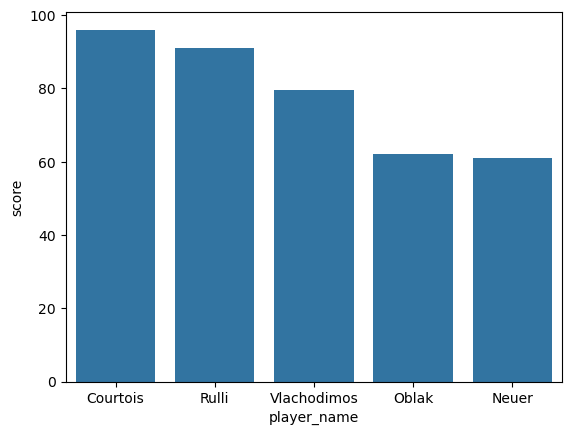

In [109]:
sns.barplot(best_keepers, x="player_name", y="score");